### Import

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import joblib

In [21]:
df = pd.read_csv('./traveller.csv', encoding='UTF8')
df

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,b011774,31,여,30,6,1,1,1,3.0,NaN,...,2,6,울산광역시,경남,2인 가족 여행,2022-10-25~2022-10-26,2,1.0,5.0,1
1,d009928,29,여,20,6,2,1,4,12.0,NaN,...,1,7,광주광역시,제주,2인 여행(가족 외),2022-10-30~2022-11-01,2,1.0,5.0,1
2,d010131,26,남,20,7,2,1,1,12.0,NaN,...,2,7,부산광역시,제주,나홀로 여행,2022-11-02~2022-11-04,5,2.0,10.0,0
3,d006004,50,여,20,6,1,1,1,3.0,NaN,...,3,6,제주특별자치도,제주,2인 여행(가족 외),2022-10-30~2022-10-31,3,1.0,7.0,1
4,d002965,50,여,30,6,1,2,4,3.0,NaN,...,1,4,제주특별자치도,제주,자녀 동반 여행,2022-10-08~2022-10-10,3,1.0,8.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,d002221,11,남,30,6,1,1,1,2.0,NaN,...,6,6,서울특별시,제주,2인 여행(가족 외),2022-10-02~2022-10-05,2,3.0,5.0,1
3196,d002109,41,여,30,5,1,1,1,3.0,NaN,...,2,7,경기도,제주,나홀로 여행,2022-10-04~2022-10-07,2,1.0,4.0,0
3197,d006910,50,여,30,5,1,1,1,4.0,NaN,...,6,7,제주특별자치도,제주,나홀로 여행,2022-10-18~2022-10-19,1,4.0,5.0,0
3198,d010634,11,여,20,6,1,1,4,3.0,NaN,...,2,7,서울특별시,제주,2인 여행(가족 외),2022-11-05~2022-11-07,2,5.0,1.0,1


### Travel Style

사용자 설문조사 페이지 -> UI 간소화를 위해 3~4개만

TRAVEL_STYL_1 자연 vs 도시  
TRAVEL_STYL_2 숙박 vs 당일  
TRAVEL_STYL_3 새로운지역 vs 익숙한지역  
TRAVEL_STYL_4 편하지만 비싼 숙소 vs 불편하지만 저렴한 숙소  
TRAVEL_STYL_5 휴양/휴식 vs 체험활동  
TRAVEL_STYL_6 잘 알려지지 않은 방문지 vs 알려진 방문지  
TRAVEL_STYL_7 계획에 따른 여행 vs 상황에 따른 여행  
TRAVEL_STYL_8 사진 촬영 안중요함 vs 사진 촬영 중요  

### 동행 추천에 필요한 feature: 사용자ID/성별/나이대/소득/여행스타일1~8

In [22]:
# 'selected_columns'에 'TRAVEL_STYL_'로 시작하는 컬럼 추가
selected_columns = ['TRAVELER_ID', 'GENDER', 'AGE_GRP', 'INCOME'] + [col for col in df.columns if col.startswith('TRAVEL_STYL_')]
df = df[selected_columns]

original_df = df.copy()   # 원본 저장 
df

,TRAVELER_ID,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8
0,b011774,여,30,4,4,2,2,4,3,3,2,6
1,d009928,여,20,2,6,1,2,3,1,6,1,7
2,d010131,남,20,3,6,2,1,6,5,6,2,7
3,d006004,여,20,4,5,7,6,2,2,5,3,6
4,d002965,여,30,1,1,7,1,1,7,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,d002221,남,30,4,2,1,1,2,3,4,6,6
3196,d002109,여,30,4,2,1,2,3,2,4,2,7
3197,d006910,여,30,3,4,4,2,2,6,4,6,7
3198,d010634,여,20,3,4,1,2,5,3,5,2,7


In [23]:
# 각 컬럼의 null 값 확인
null_counts = df.isnull().sum()

# 출력  # 전부 0으로 나오므로 null값 없음 
print(null_counts)

TRAVELER_ID      0
GENDER           0
AGE_GRP          0
INCOME           0
TRAVEL_STYL_1    0
TRAVEL_STYL_2    0
TRAVEL_STYL_3    0
TRAVEL_STYL_4    0
TRAVEL_STYL_5    0
TRAVEL_STYL_6    0
TRAVEL_STYL_7    0
TRAVEL_STYL_8    0
dtype: int64


### Data Preprocessing

In [24]:
# GENDER를 라벨 인코딩 (예: 남성:0, 여성:1)
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])

# AGE_GRP, INCOME, TRAVEL_STYL_ 피처들을 수치 데이터라고 가정하고 표준화
scaler = StandardScaler()
scaled_columns = ['GENDER', 'AGE_GRP', 'INCOME'] + [col for col in df.columns if col.startswith('TRAVEL_STYL_')]
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])
df

C:\Users\sec\AppData\Local\Temp\ipykernel_24216\530192025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENDER'] = le.fit_transform(df['GENDER'])
C:\Users\sec\AppData\Local\Temp\ipykernel_24216\530192025.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[scaled_columns] = scaler.fit_transform(df[scaled_columns])


,TRAVELER_ID,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8
0,b011774,0.747459,0.062281,-0.02275,0.701826,-0.310609,-0.376688,0.443619,-0.341740,-0.366363,-0.993870,0.641407
1,d009928,0.747459,-0.992208,-1.06277,1.948823,-0.934165,-0.376688,-0.186746,-1.472041,1.435422,-1.496300,1.192266
2,d010131,-1.337866,-0.992208,-0.54276,1.948823,-0.310609,-1.027202,1.704349,0.788562,1.435422,-0.993870,1.192266
3,d006004,0.747459,-0.992208,-0.02275,1.325324,2.807171,2.225368,-0.817110,-0.906890,0.834827,-0.491440,0.641407
4,d002965,0.747459,0.062281,-1.58278,-1.168670,2.807171,-1.027202,-1.447475,1.918863,2.036018,-1.496300,-0.460312
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,d002221,-1.337866,0.062281,-0.02275,-0.545172,-0.934165,-1.027202,-0.817110,-0.341740,0.234232,1.015851,0.641407
3196,d002109,0.747459,0.062281,-0.02275,-0.545172,-0.934165,-0.376688,-0.186746,-0.906890,0.234232,-0.993870,1.192266
3197,d006910,0.747459,0.062281,-0.54276,0.701826,0.936503,-0.376688,-0.817110,1.353713,0.234232,1.015851,1.192266
3198,d010634,0.747459,-0.992208,-0.54276,0.701826,-0.934165,-0.376688,1.073984,-0.341740,0.834827,-0.993870,1.192266


In [25]:
import threadpoolctl
print(threadpoolctl.__version__)

3.1.0


In [ ]:
# https://velog.io/@seonydg/scikit-learncluster-KMeans-Nonetype-object-has-no-attribute-split-%EC%98%A4%EB%A5%98
pip install threadpoolctl==3.1.0

### Clustering

C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

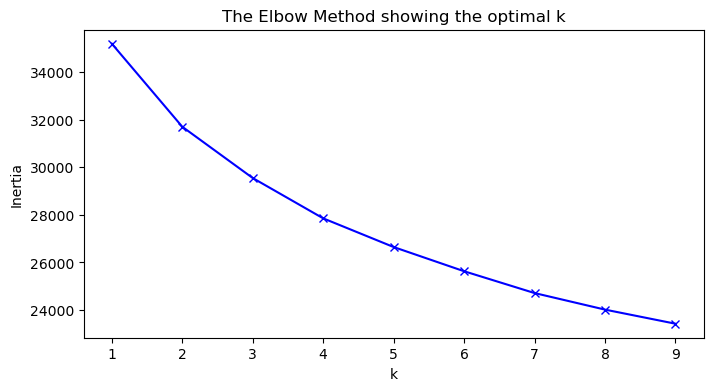

In [29]:
# TRAVEL_ID 컬럼을 제외한 나머지 컬럼 선택
df_without_travel_id = df.drop('TRAVELER_ID', axis=1)

# KMeans 클러스터링 수행
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_without_travel_id)  # 수정된 데이터프레임 사용
    inertia.append(kmeans.inertia_)
# 엘보우 그래프 그리기
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [31]:
from sklearn.cluster import KMeans

# TRAVEL_ID 컬럼을 제외한 나머지 데이터 선택
X = df.drop('TRAVELER_ID', axis=1)

# KMeans 모델을 k=4로 생성 및 훈련
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# 클러스터 중심 확인
centroids = kmeans.cluster_centers_
print("Centroids:", centroids)

Centroids: [[ 1.46985592e-01 -3.18859718e-01 -3.22852449e-01 -5.27893975e-01
  -2.44496818e-01 -4.26848463e-01  4.09442829e-01  5.31850284e-02
  -7.41192346e-01  6.50832656e-01 -1.43733599e-01  1.77635684e-15]
 [-8.25789557e-01  8.74985684e-01  9.75729864e-01 -3.30267522e-01
  -1.59331899e-01 -6.10542633e-02 -3.81636470e-01 -4.62962776e-01
  -2.17991175e-01 -3.65088840e-01 -3.22596916e-01  2.00000000e+00]
 [ 9.41899822e-02  1.32964644e-01 -1.79251315e-01  5.82414180e-01
   9.34796929e-01  8.46029053e-01  3.52212025e-01  2.65159648e-01
   4.93860136e-01  3.48464384e-01 -3.74404809e-01  3.00000000e+00]
 [ 3.81498257e-01 -4.40325973e-01 -2.70605550e-01  2.44722823e-01
  -3.87015403e-01 -2.31454134e-01 -3.52355436e-01  7.78687019e-02
   4.16967728e-01 -5.69178102e-01  6.34542386e-01  1.00000000e+00]]


C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
# K-means 클러스터링
n_clusters = 4  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['CLUSTER'] = kmeans.fit_predict(df[scaled_columns])

C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sec\AppData\Local\Temp\ipykernel_24216\1627468796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CLUSTER'] = kmeans.fit_predict(df[scaled_columns])


In [35]:
df

,TRAVELER_ID,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,CLUSTER
0,b011774,0.747459,0.062281,-0.02275,0.701826,-0.310609,-0.376688,0.443619,-0.341740,-0.366363,-0.993870,0.641407,1
1,d009928,0.747459,-0.992208,-1.06277,1.948823,-0.934165,-0.376688,-0.186746,-1.472041,1.435422,-1.496300,1.192266,1
2,d010131,-1.337866,-0.992208,-0.54276,1.948823,-0.310609,-1.027202,1.704349,0.788562,1.435422,-0.993870,1.192266,1
3,d006004,0.747459,-0.992208,-0.02275,1.325324,2.807171,2.225368,-0.817110,-0.906890,0.834827,-0.491440,0.641407,3
4,d002965,0.747459,0.062281,-1.58278,-1.168670,2.807171,-1.027202,-1.447475,1.918863,2.036018,-1.496300,-0.460312,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,d002221,-1.337866,0.062281,-0.02275,-0.545172,-0.934165,-1.027202,-0.817110,-0.341740,0.234232,1.015851,0.641407,0
3196,d002109,0.747459,0.062281,-0.02275,-0.545172,-0.934165,-0.376688,-0.186746,-0.906890,0.234232,-0.993870,1.192266,1
3197,d006910,0.747459,0.062281,-0.54276,0.701826,0.936503,-0.376688,-0.817110,1.353713,0.234232,1.015851,1.192266,1
3198,d010634,0.747459,-0.992208,-0.54276,0.701826,-0.934165,-0.376688,1.073984,-0.341740,0.834827,-0.993870,1.192266,1


In [37]:
# 원본 데이터프레임에 cluster 컬럼 추가 
original_df['CLUSTER'] = df['CLUSTER']
original_df

,TRAVELER_ID,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,CLUSTER
0,b011774,여,30,4,4,2,2,4,3,3,2,6,1
1,d009928,여,20,2,6,1,2,3,1,6,1,7,1
2,d010131,남,20,3,6,2,1,6,5,6,2,7,1
3,d006004,여,20,4,5,7,6,2,2,5,3,6,3
4,d002965,여,30,1,1,7,1,1,7,7,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,d002221,남,30,4,2,1,1,2,3,4,6,6,0
3196,d002109,여,30,4,2,1,2,3,2,4,2,7,1
3197,d006910,여,30,3,4,4,2,2,6,4,6,7,1
3198,d010634,여,20,3,4,1,2,5,3,5,2,7,1


In [38]:
original_df.to_csv('TravelerDB.csv')   # 동행 추천 최종 DB

In [39]:
# 모델 저장
joblib.dump(kmeans, 'traveler_kmeans_model.pkl')

['traveler_kmeans_model.pkl']

In [40]:
# 스케일러 저장 
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Flask 연동

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# 모델과 스케일러 로드
kmeans = joblib.load('traveler_kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')  

# 원본 데이터프레임 로드
original_df = pd.read_csv('TravelerDB.csv')

@app.route('/predict', methods=['POST'])
def predict_cluster():
    # 새로운 사용자 데이터 받기
    data = request.get_json()
    new_user_data = pd.DataFrame([data])
    
    # 사용자 데이터 스케일링
    scaled_columns = ['GENDER', 'AGE_GRP', 'INCOME'] + [col for col in new_user_data.columns if col.startswith('TRAVEL_STYL_')]
    new_user_data_scaled = scaler.transform(new_user_data[scaled_columns])

    # 클러스터 예측
    cluster = kmeans.predict(new_user_data_scaled)

    # 코사인 유사도를 통한 사용자 추천
    df_scaled = scaler.transform(original_df[scaled_columns])  # 원본 데이터를 스케일링
    similarity = cosine_similarity(new_user_data_scaled, df_scaled)
    similar_users = np.argsort(-similarity[0])[:10]  # 가장 유사한 10명 선택
    recommended_users = original_df.iloc[similar_users]['TRAVELER_ID'].tolist()

    return jsonify({'cluster': int(cluster[0]), 'recommended_users': recommended_users})

if __name__ == '__main__':
    app.run(debug=True)
